#  <center> Wine Data Analysis Project

## 1 - Assesing Data

In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
df_red=pd.read_csv('winequality-red.csv', sep=';')
print(df_red.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [3]:
df_white=pd.read_csv('winequality-white.csv', sep= ';')
print(df_white.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


In [4]:
print(df_white.duplicated().sum())
print(df_red.duplicated().sum())

937
240


In [6]:
print(df_white.nunique())

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64


In [7]:
print(df_red.nunique())

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64


In [8]:
print(df_red.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

## 2 - Joining DataFrames

In [9]:
df_red['wine_type'] = ['red']
df_white['wine_type']= ['white']

#This will show an error due to not matching number of objects in square brackets and the number of rows.

ValueError: Length of values (1) does not match length of index (1599)

In [14]:
# Due to the above error we need to create an array with the same object repeated to match the number of rows in each array.

import numpy as np

red_color=np.repeat(['red'], len(df_red['quality']))
white_color = np.repeat(['white'], len(df_white['quality']))
print(red_color)
print(red_color.shape)

['red' 'red' 'red' ... 'red' 'red' 'red']
(1599,)


In [15]:
# Creating new columns for both dataframes and check updated dataframes.
## First DF.
df_red['wine_color'] = red_color
print(df_red.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wine_color  
0      9.4        5        red  
1      9.8        5 

In [16]:
## Second DF.
df_white['wine_color'] = white_color
print(df_white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality wine_color  
0      8.8        6      white  
1      9.5        6 

In [17]:
# Concatenating Dataframes
df_all= pd.concat([df_white, df_red], ignore_index= True)
print(df_all)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [18]:
# To confirm the concat is done perfectly, Check shape for all Df's.

print(df_white.shape)
print(df_red.shape)
print(df_all.shape)

#Check in mathematical prospect:
print(df_white.shape[0] + df_red.shape[0] == df_all.shape[0])  #Should be True.
print(df_white.shape[1] == df_red.shape[1] == df_all.shape[1])  #Should be True.

(4898, 13)
(1599, 13)
(6497, 13)
True
True


In [19]:
# Check new DF
print(df_all.info())
print(df_all.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_color            6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None
       fixed acidity  volatile acidity  citric acid  resid

In [20]:
# Saving new DF to a new CSV file.
df_all.to_csv('winequality-all')

## 3- Data Visualization

### Histograms for Various Features

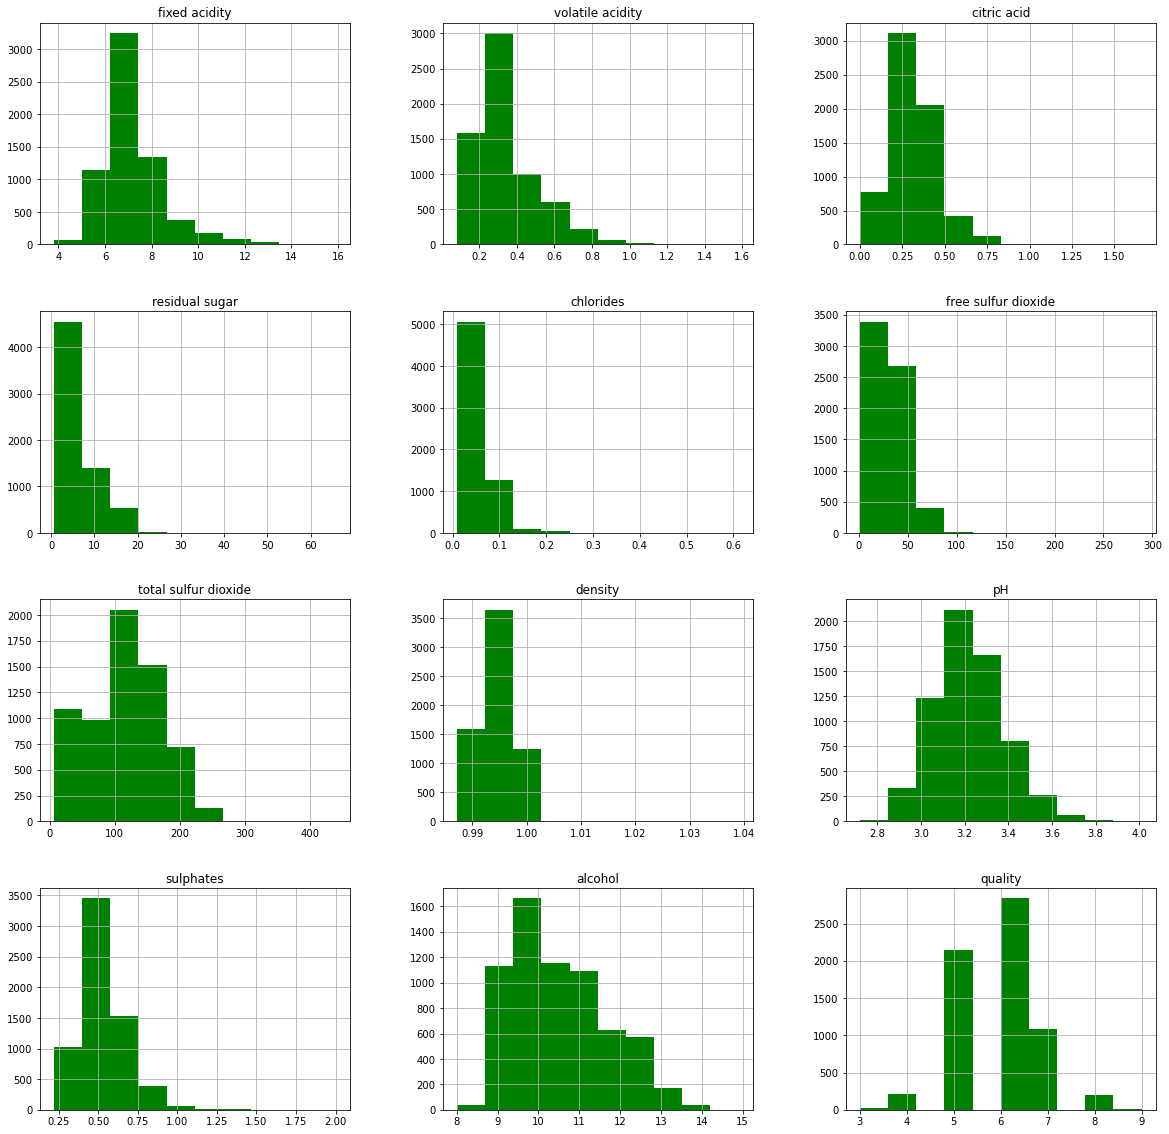

In [21]:
import matplotlib as plt

df_all.hist(figsize=(20,20), color='green');

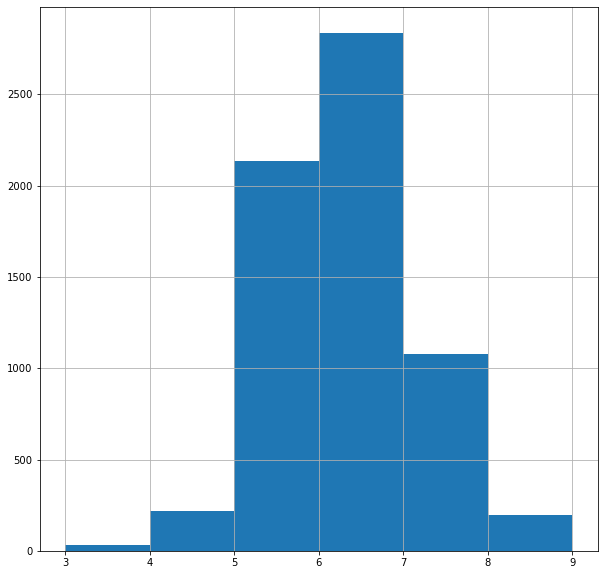

In [22]:
# To show more obvious statistics about quality
df_all['quality'].hist(figsize= (10,10), bins=6);

### Scatterplots of Quality Against Various Features

Study for the relations between features and wine quality using scatter plots.

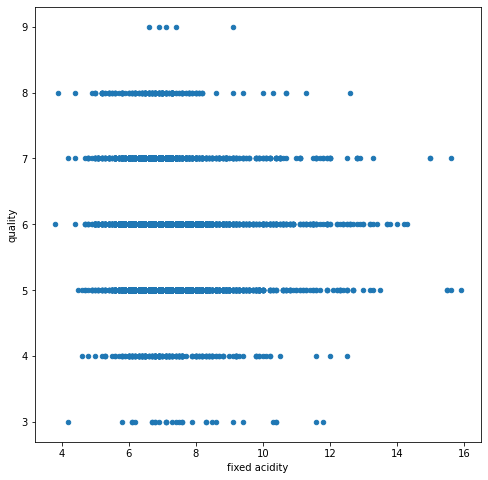

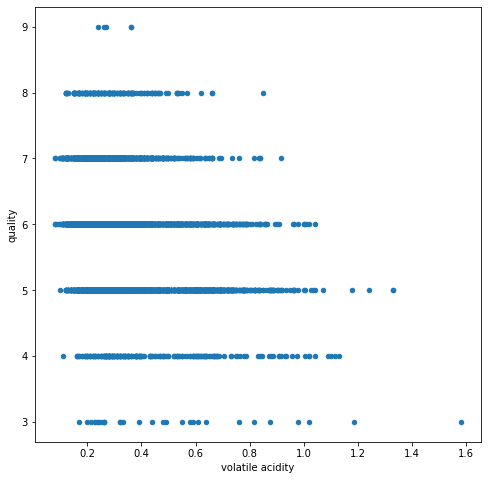

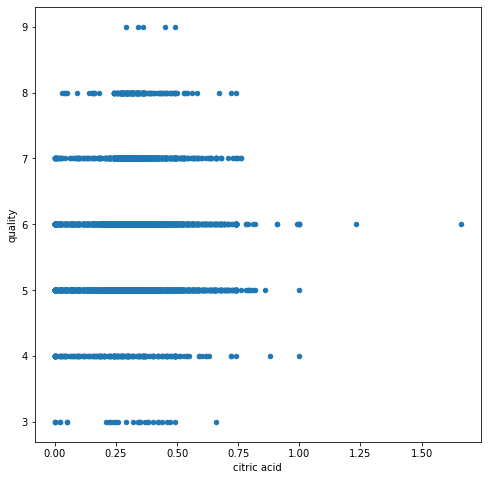

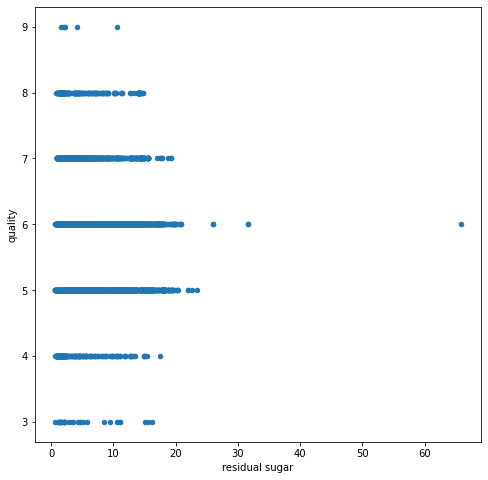

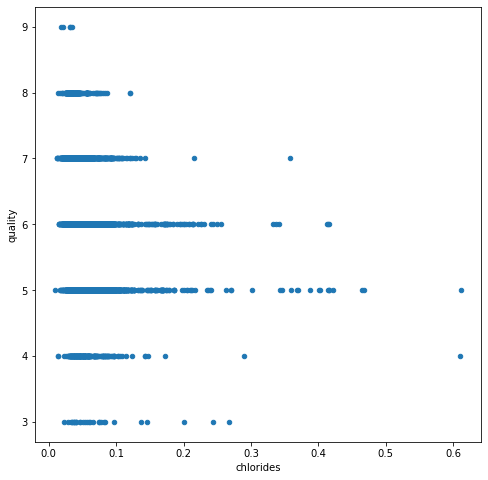

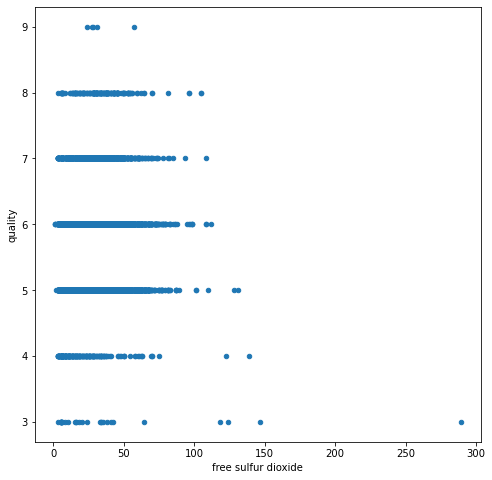

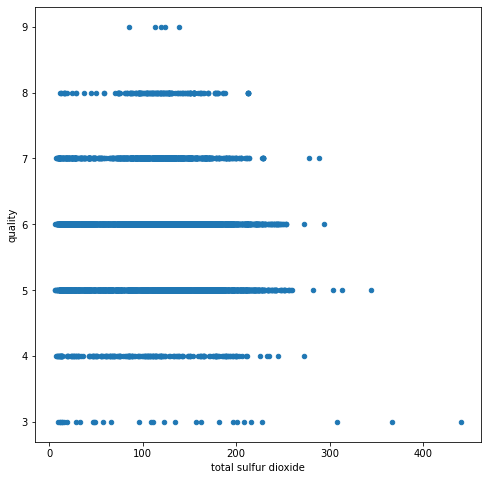

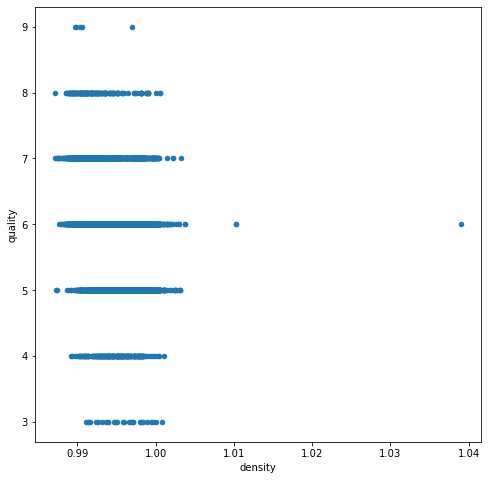

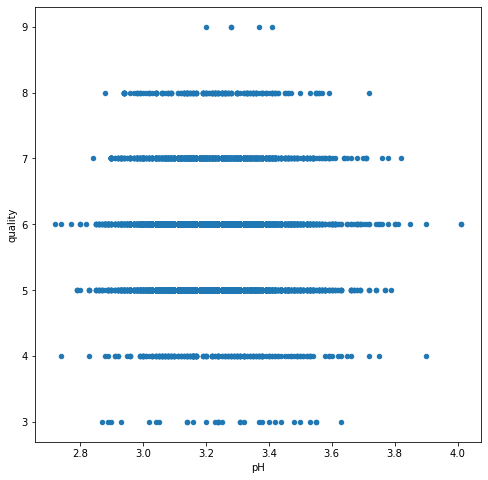

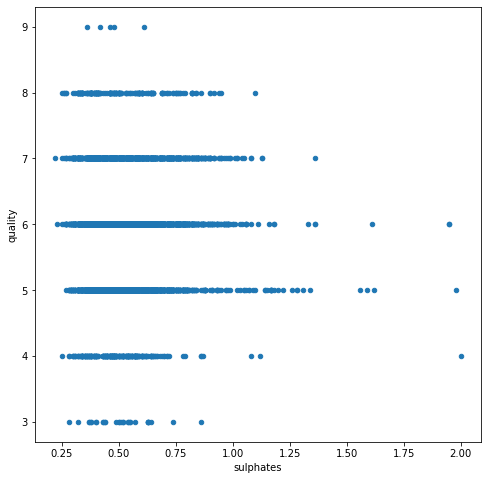

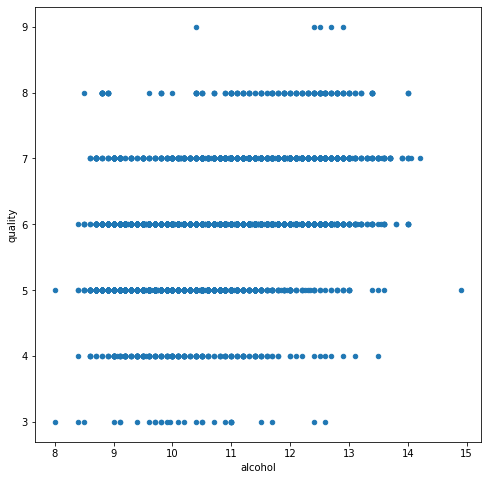

In [23]:
# Will use for loop to facilitate drawing of all scatter plots in one step ...

feature_list= list(df_all.columns[:-2])

for feature in feature_list:
    df_all.plot.scatter(y='quality', x= feature, figsize=(8,8));


## 4 - Questions to analyze data for?

*Q1: Is a certain type of wine (red or white) associated with higher quality?*

*Q2: What level of acidity (pH value) receives the highest average rating?*

*Q3: Do wines with higher alcoholic content receive better ratings?*

*Q4: Do sweeter wines (more residual sugar) receive better ratings?*

In [24]:
# For Q1 Analysis
df_all.groupby('wine_color')['quality'].mean()

wine_color
red      5.636023
white    5.877909
Name: quality, dtype: float64

_This shows that the white wine has higher average quality than red wine._ 

In [25]:
# For Q2 Analysis; need to know that:
# Acidity Levels:
# High: Lowest 25% of pH values
# Moderately High: 25% - 50% of pH values
# Medium: 50% - 75% of pH values
# Low: 75% - max pH value

In [26]:
# we will need to determine the acidity level of all wine rows we have first ...

# You can get these numbers also from df_all['pH'].describe

q1=df_all['pH'].quantile(q=0.25)
q2=df_all['pH'].quantile(q=0.5)
q3=df_all['pH'].quantile(q=0.75)

print('The first, second and third quartiles are {}, {} and {}'.format(q1, q2, q3))

The first, second and third quartiles are 3.11, 3.21 and 3.32


In [27]:
# we need to add column for acidity level ... using for loop to facilitate the process.

pH_list= list(df_all['pH'])
acidity_level=[]

for pH in pH_list :
    if pH < q1 :
        acidity_level.append('High')
    elif pH < q2 :
        acidity_level.append('Moderately High')
    elif pH < q3:
        acidity_level.append('Medium')
    else:
        acidity_level.append('Low')
        

df_all['acidity level'] = acidity_level
print(df_all.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality wine_color    acidity level  
0      8.8        6      white      

In [28]:
# Answering for Q2 ...

df_all.groupby('acidity level')['quality'].mean()

acidity level
High               5.785850
Low                5.863930
Medium             5.839949
Moderately High    5.782028
Name: quality, dtype: float64

_This shows that as the wine has higher acidity level, quality decreases._ 

In [32]:
# Answering for Q3 ... Do wines with higher alcoholic content receive better ratings?
## Low alcohol (samples with an alcohol content less than the median)
## High alcohol (samples with an alcohol content greater than or equal to the median)

median= df_all['alcohol'].median()
print('The median alcohol is {}.'.format(median))

low_alcohol= df_all.query('alcohol < {}'.format(median))
high_alcohol = df_all.query('alcohol >= 10.3')

low_r = low_alcohol['quality'].mean()
high_r = high_alcohol['quality'].mean()

print('\nThe Average rating of low alcoholic content is {:0.2f}, but for high alcoholic content is {:0.2f}.'.format(low_r, high_r))


The median alcohol is 10.3.

The Average rating of low alcoholic content is 5.48, but for high alcoholic content is 6.15.


In [33]:
# Answering for Q4 ... Do sweeter wines (more residual sugar) receive better ratings?
## High sweet (samples with an residual sugar content greater than or equal to the median)

median1= df_all['residual sugar'].median()
print('The median residualsugar is {}.'.format(median1))

low_sugar= df_all[df_all['residual sugar'] < 3.0]['quality'].mean()
high_sugar= df_all[df_all['residual sugar'] >= 3.0]['quality'].mean()

print('\nThe average quality for the high sugar content wine is {:0.3f} but for low sugar content is {:0.3f}.'.format(high_sugar, low_sugar))

The median residualsugar is 3.0.

The average quality for the high sugar content wine is 5.828 but for low sugar content is 5.809.


In [34]:
print(df_all.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality wine_color    acidity level  
0      8.8        6      white      

## 4 - Visualizing Data using Matplotlib

### 1: Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples. 

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


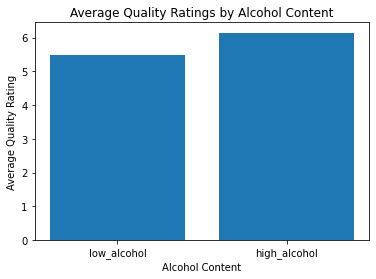

In [41]:
median= df_all['alcohol'].median()

low_alcohol= df_all.query('alcohol < {}'.format(median))
high_alcohol = df_all.query('alcohol >= 10.3')

low_r = low_alcohol['quality'].mean()
high_r = high_alcohol['quality'].mean()

plt.bar(['low_alcohol', 'high_alcohol'], [low_r, high_r])
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating')
plt.show();

### 2: Do sweeter wines receive higher ratings?
Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.

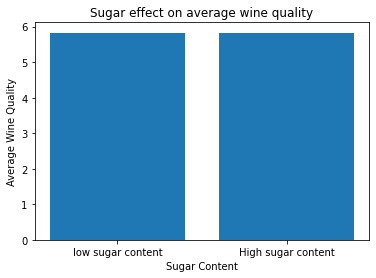

In [42]:
median1= df_all['residual sugar'].median()

low_sugar= df_all[df_all['residual sugar'] < 3.0]['quality'].mean()
high_sugar= df_all[df_all['residual sugar'] >= 3.0]['quality'].mean()

plt.bar(['low sugar content', 'High sugar content'], [low_sugar, high_sugar])
plt.title('Sugar effect on average wine quality')
plt.xlabel('Sugar Content')
plt.ylabel('Average Wine Quality')
plt.show();

### 3: What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

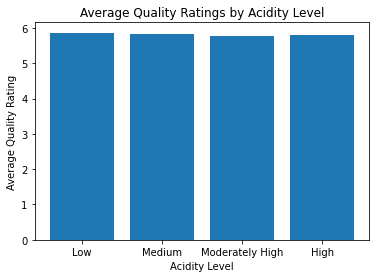

In [51]:
# Use groupby to get the mean quality for each acidity level
acidity_level_quality_means = df_all.groupby('acidity level')['quality'].mean()
acidity_level_quality_means
# Create a bar chart with proper labels
locations = [4, 1, 2, 3]  # reorder values above to go from low to high
heights = acidity_level_quality_means

# labels = ['Low', 'Medium', 'Moderately High', 'High']
labels = acidity_level_quality_means.index.str.replace('_', ' ').str.title() # alternative to commented out line above

plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating');